In [96]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np



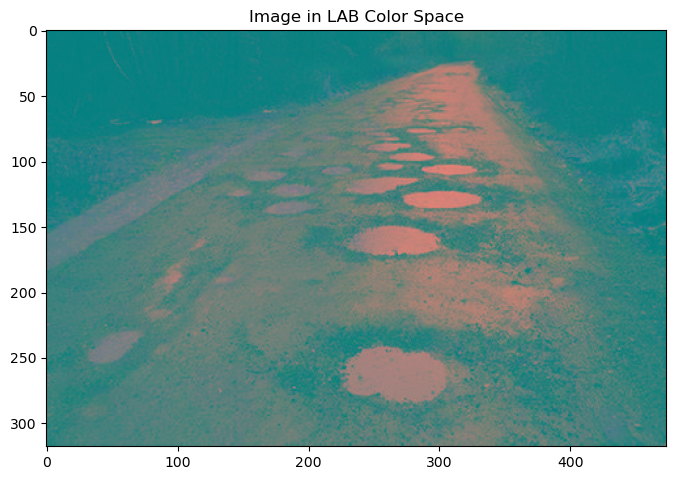

In [97]:
image_path = 'pothole1.jpg'
image = cv.imread(image_path)

image_lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)

# Display the LAB image
plt.figure(figsize=(8, 8))
plt.imshow(image_lab)
plt.title('Image in LAB Color Space')
plt.show()

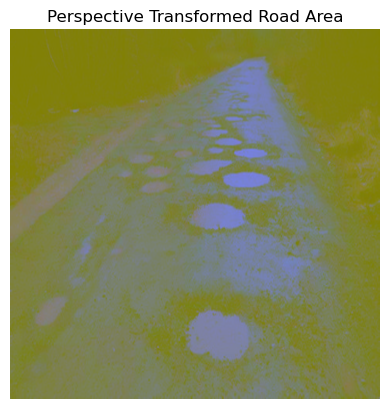

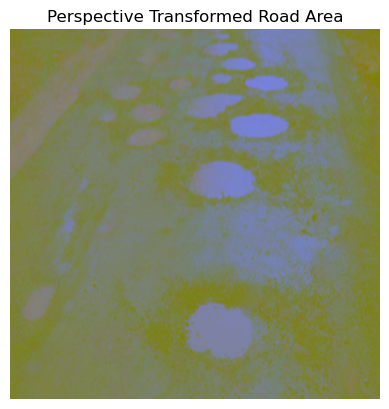

In [98]:

desired_size = (800, 800)  # You can adjust this size as needed
resized_image = cv.resize(image_lab, desired_size, interpolation=cv.INTER_LINEAR)

# Display the result using matplotlib
plt.imshow(cv.cvtColor(resized_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Perspective Transformed Road Area")
plt.axis('off')
plt.show()

# Define the source points (corners of the road area in the resized image)
# Adjust these points to match the road area in the resized image
src_points = np.float32([
    [0, 800],  # Bottom-left corner of the road
    [800, 800],  # Bottom-right corner of the road
    [700, 200],  # Top-right corner of the road
    [100, 200]   # Top-left corner of the road
])

# Define the destination points (where we want the road to be mapped to)
dst_points = np.float32([
    [0, 800],   # Bottom-left corner
    [800, 800],  # Bottom-right corner
    [800, 0],    # Top-right corner
    [0, 0]       # Top-left corner
])

# Calculate the perspective transform matrix
M = cv.getPerspectiveTransform(src_points, dst_points)

# Apply the perspective transform to get the warped image
warped_image = cv.warpPerspective(resized_image, M, desired_size)

# Display the result using matplotlib
plt.imshow(cv.cvtColor(warped_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Perspective Transformed Road Area")
plt.axis('off')
plt.show()

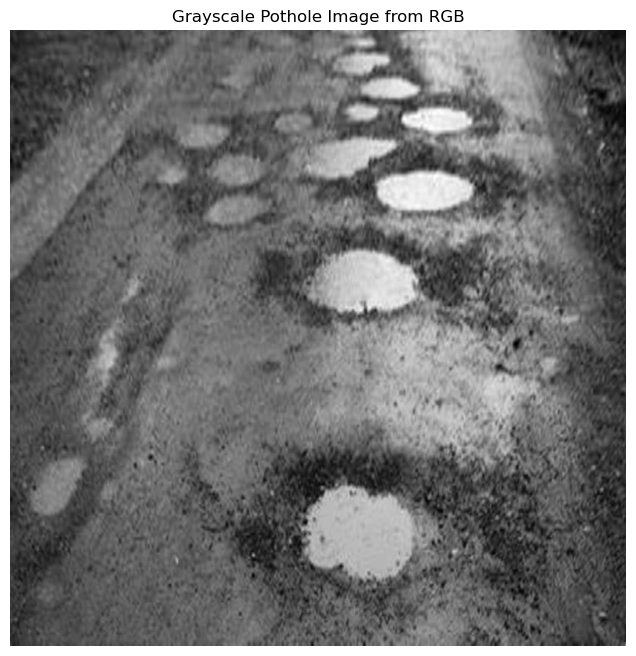

In [99]:
image_gray = cv.cvtColor(warped_image, cv.COLOR_RGB2GRAY)
image1 = cv.cvtColor(warped_image, cv.COLOR_RGB2GRAY)
# Display the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(image_gray, cmap='gray')  # Use 'gray' colormap for grayscale
plt.title('Grayscale Pothole Image from RGB')
plt.axis('off')
plt.show()

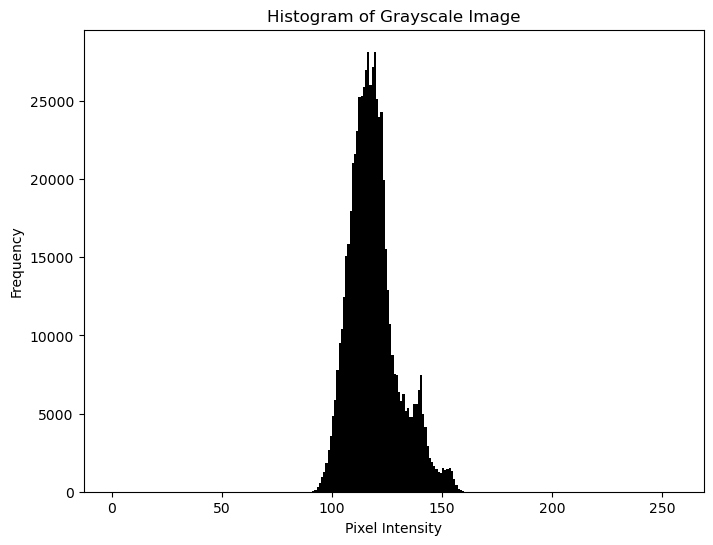

In [100]:
# Calculate and display the histogram
plt.figure(figsize=(8, 6))
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

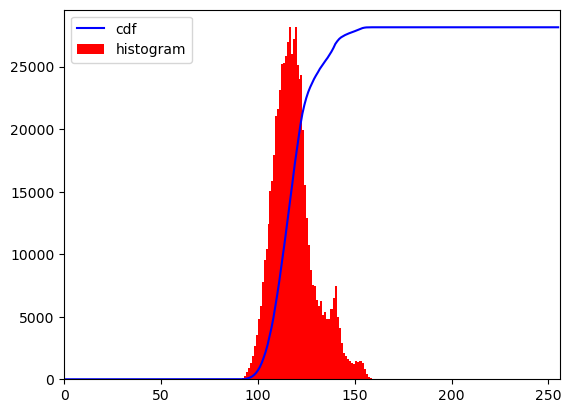

In [101]:

hist,bins = np.histogram(image_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


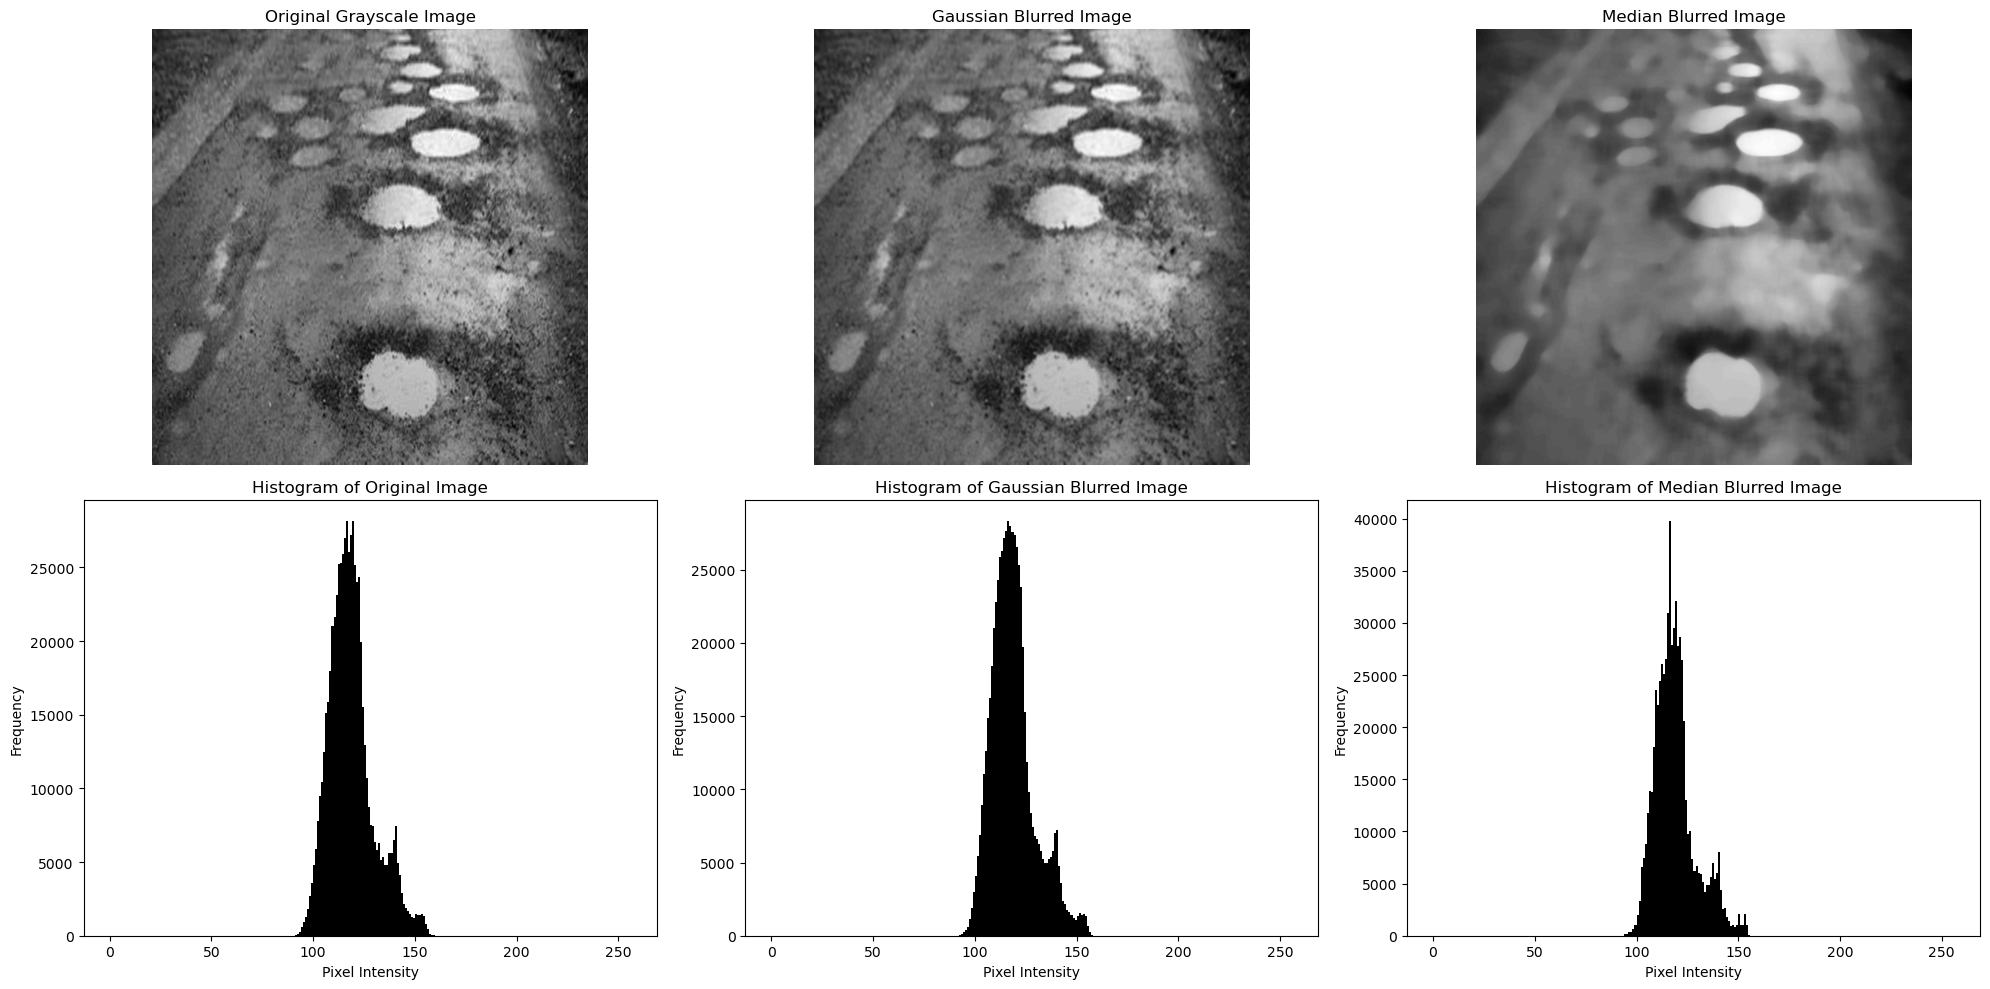

In [102]:
# Apply Gaussian Blur
blurred_image = cv.GaussianBlur(image_gray, (7,7), 0)
# Apply Median Blur
median_blurred_image = cv.medianBlur(image_gray, 25)

# Display the original and blurred images
# Display the original and blurred images
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(median_blurred_image, cmap='gray')
plt.title('Median Blurred Image')
plt.axis('off')

# Calculate and display histograms
plt.subplot(2, 3, 4)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(blurred_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Gaussian Blurred Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(median_blurred_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Median Blurred Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

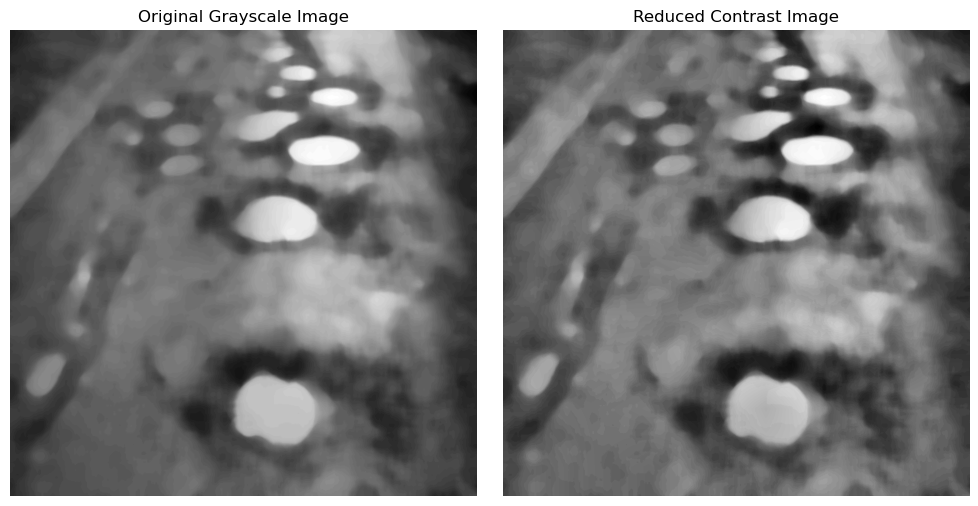

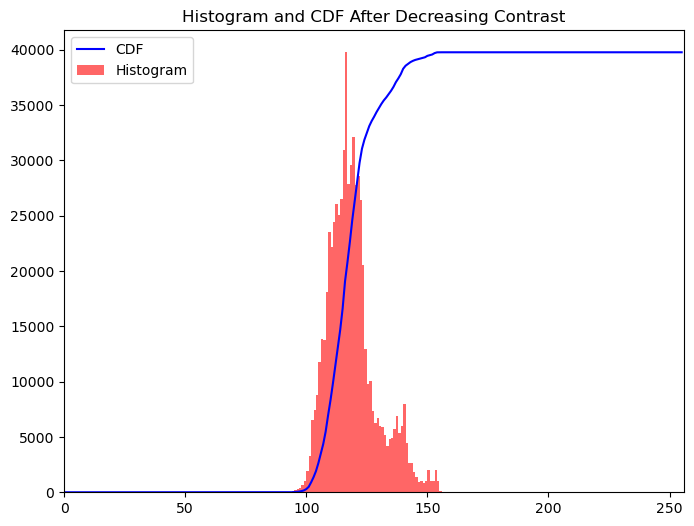

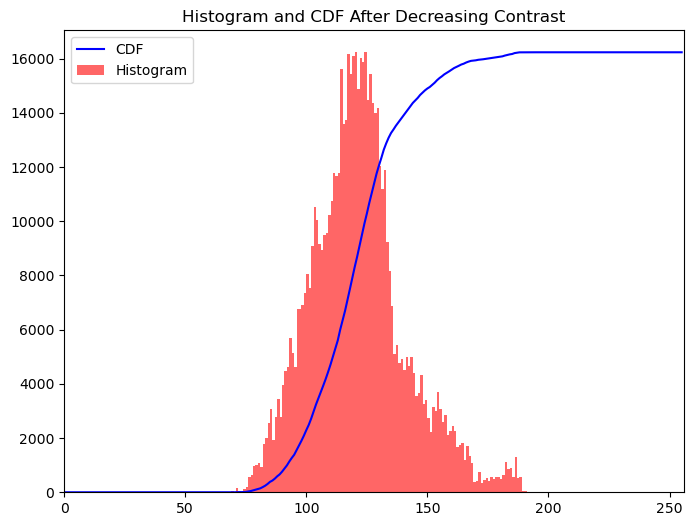

In [103]:
image_gray = median_blurred_image


# Create a CLAHE object (Clip Limit controls contrast, and tileGridSize sets the grid size for histogram equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
contrast_image = clahe.apply(image_gray)

# Display the original and contrast-reduced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_image, cmap='gray')
plt.title('Reduced Contrast Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the histogram and CDF after contrast reduction
hist, bins = np.histogram(image_gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(8, 6))
plt.plot(cdf_normalized, color='b')
plt.hist(image_gray.flatten(), 256, [0, 256], color='r', alpha=0.6)
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram and CDF After Decreasing Contrast')
plt.show()

# Plot the histogram and CDF after contrast reduction
hist, bins = np.histogram(contrast_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(8, 6))
plt.plot(cdf_normalized, color='b')
plt.hist(contrast_image.flatten(), 256, [0, 256], color='r', alpha=0.6)
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram and CDF After Decreasing Contrast')
plt.show()

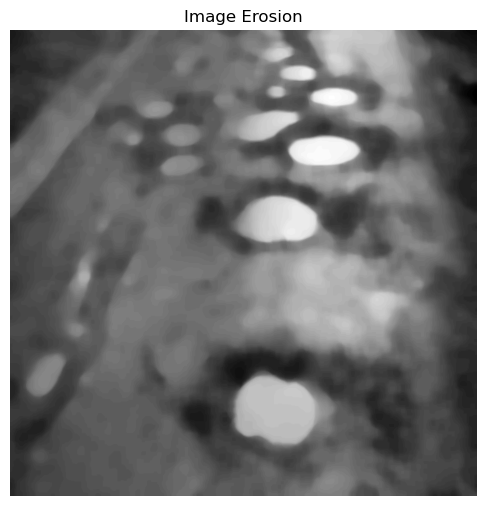

In [104]:
# Reading the input image
img = image_gray

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# Morphological Opening (removes small objects)
img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

# Morphological Closing (fills small holes)
img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image Erosion')
plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(image_closing, cmap='gray')
# plt.title('Image Dilation')
# plt.axis('off')

plt.tight_layout()
plt.show()

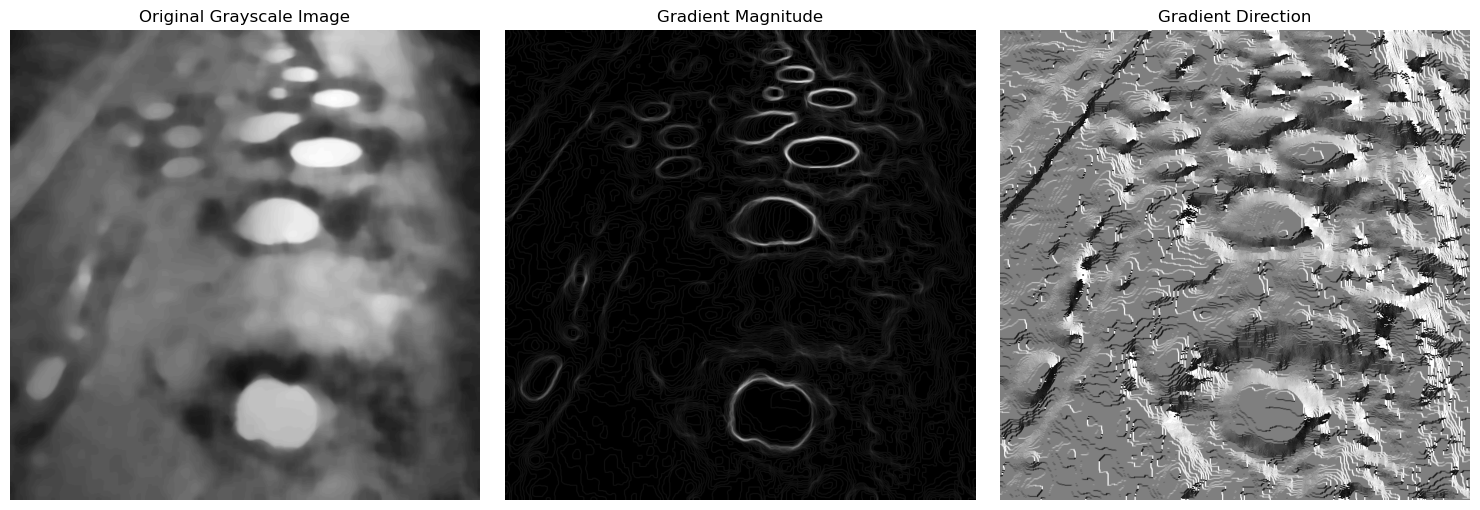

In [105]:
# Compute the gradient in the x and y directions using the Sobel operator
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Gradient in the x direction
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Gradient in the y direction

# Calculate the gradient magnitude
gradient_magnitude = cv.magnitude(sobel_x, sobel_y)

# Normalize the gradient magnitude to the range [0, 255]
gradient_magnitude = cv.normalize(gradient_magnitude, None, 0, 255, cv.NORM_MINMAX)

# Calculate the gradient direction (in degrees)
gradient_direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

# Plotting the results
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Gradient Direction
plt.subplot(1, 3, 3)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction')
plt.axis('off')

plt.tight_layout()
plt.show()

254.99999999999997


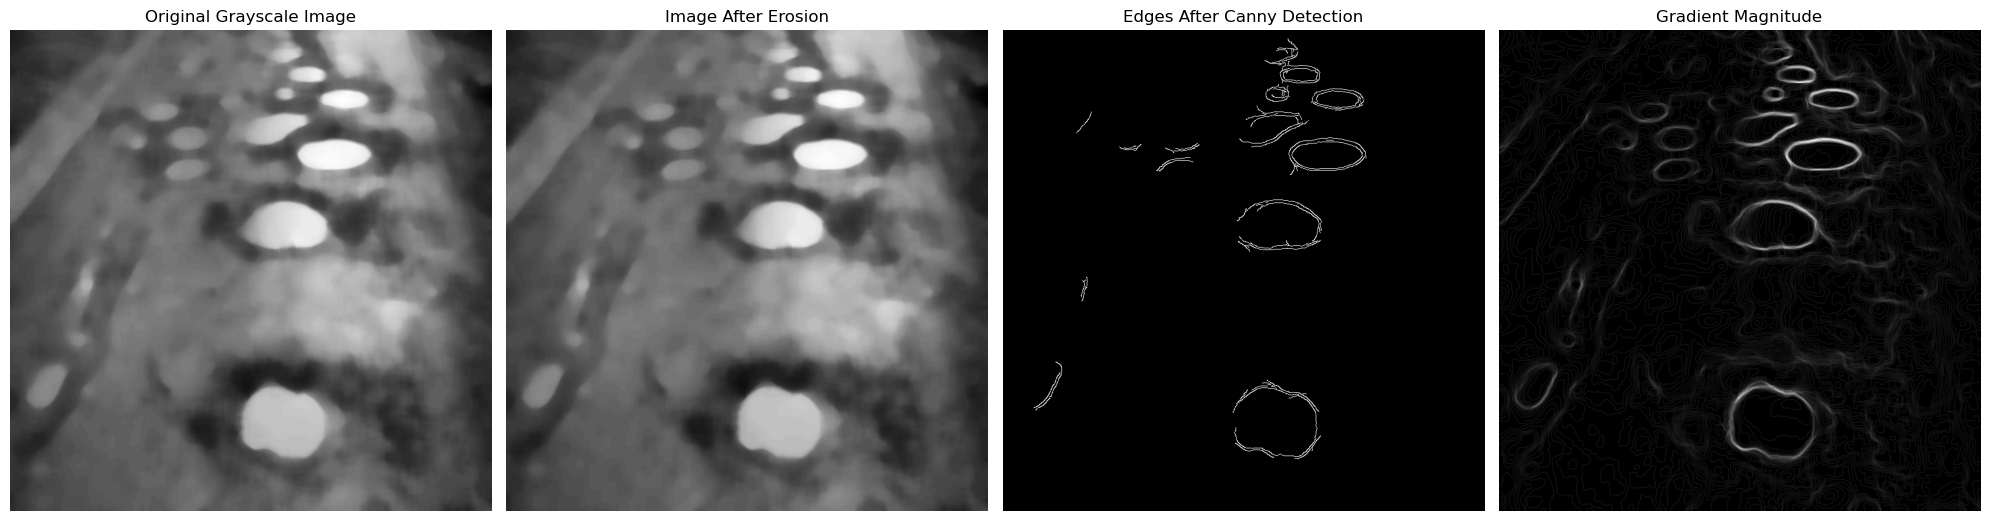

Number of potholes detected: 44


In [106]:


max_gradient = np.max(gradient_magnitude)
print(max_gradient)

lower_threshold = 1.22 * max_gradient  # 10% of the maximum gradient value
upper_threshold =  0.4 * max_gradient  # 30% of the maximum gradient value

gradient_magnitude = cv.normalize(gradient_magnitude, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

edges_erosion = cv.Canny(gradient_magnitude, lower_threshold, upper_threshold)


plt.figure(figsize=(20, 20))

plt.subplot(3, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(img, cmap='gray')
plt.title('Image After Erosion')
plt.axis('off')


plt.subplot(3, 4, 3)
plt.imshow(edges_erosion, cmap='gray')
plt.title('Edges After Canny Detection')
plt.axis('off')

# Gradient Magnitude
plt.subplot(3, 4, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')


plt.tight_layout()
plt.show()
contours, _ = cv.findContours(edges_erosion, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
number_of_potholes = len(contours)
print(f"Number of potholes detected: {number_of_potholes}")

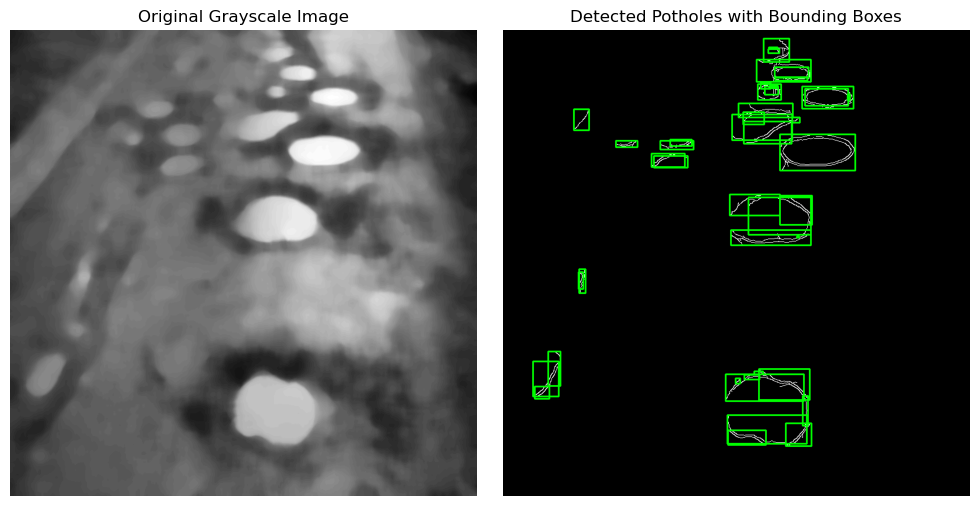

In [107]:
# Draw bounding boxes around each detected pothole
image_with_boxes = cv.cvtColor(edges_erosion, cv.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color boxes

for contour in contours:
    # Calculate the bounding box for each contour
    x, y, w, h = cv.boundingRect(contour)
    # Draw the bounding box on the image
    cv.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
# Plotting the original image and the result with bounding boxes
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Image with bounding boxes
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_with_boxes, cv.COLOR_BGR2RGB))
plt.title('Detected Potholes with Bounding Boxes')
plt.axis('off')

plt.tight_layout()
plt.show()


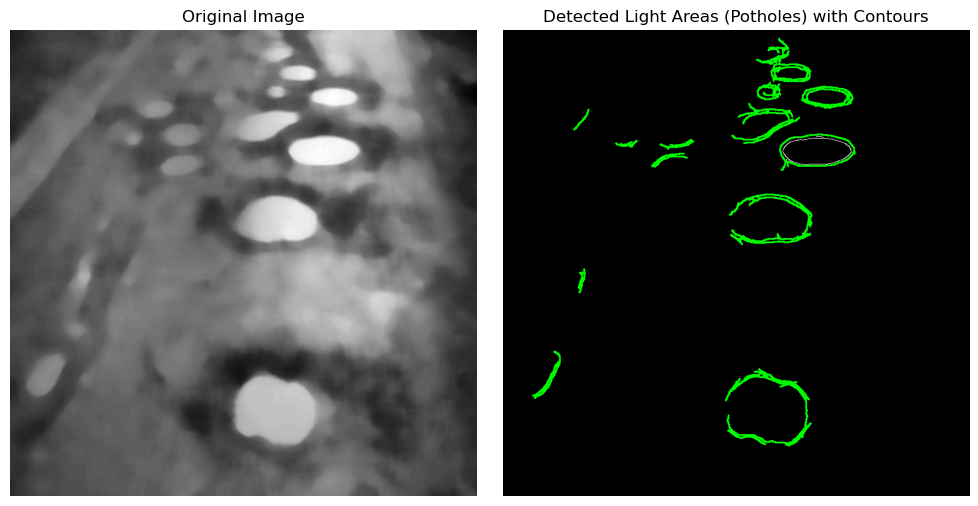

In [108]:
# Load the image

image = edges_erosion



# Apply a binary threshold to isolate white and light areas (potholes)
# Lower the threshold to capture lighter regions (e.g., threshold = 100)
_, thresh = cv.threshold(image, 100, 255, cv.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
image_contours = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
cv.drawContours(image_contours, contours, -1, (0, 255, 0), 2)  # Green contours

# Plotting the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Image with Contours
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title('Detected Light Areas (Potholes) with Contours')
plt.axis('off')

plt.tight_layout()
plt.show()



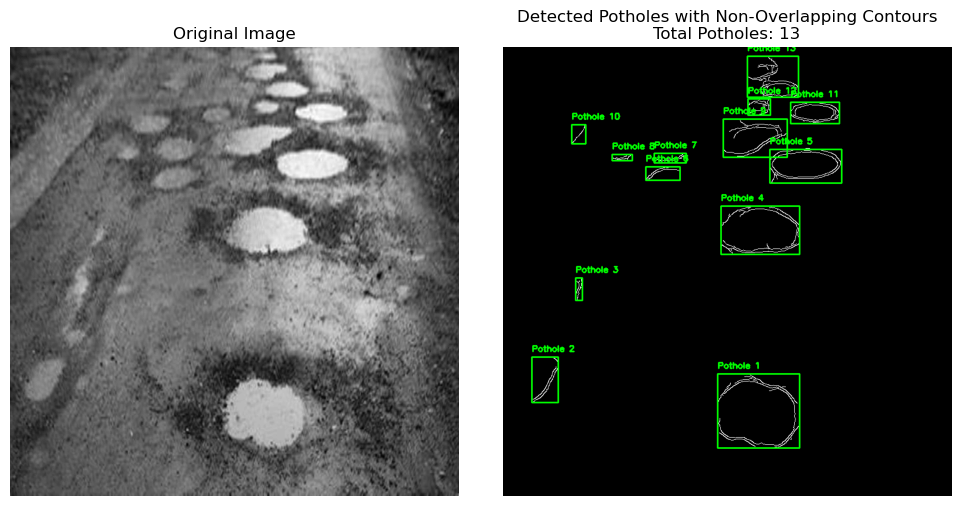

Number of potholes detected: 13


In [109]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to apply non-maximum suppression
def non_max_suppression_fast(boxes, overlap_thresh):
    if len(boxes) == 0:
        return []
    
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        
        overlap = (w * h) / area[idxs[:last]]
        
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))
    
    return boxes[pick].astype("int")

# Load the uploaded image
image = edges_erosion

# Apply Gaussian blur to smooth the image before edge detection
blurred_image = cv.GaussianBlur(image, (5, 5), 0)


# Apply a binary threshold to isolate white areas (potholes)
_, thresh = cv.threshold(blurred_image, 70, 255, cv.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create bounding boxes for each contour
boxes = []
for contour in contours:
    # Smooth the contour using approxPolyDP
    epsilon = 0.01 * cv.arcLength(contour, True)  # Adjust epsilon for smoothing level
    approx = cv.approxPolyDP(contour, epsilon, True)
    
    x, y, w, h = cv.boundingRect(approx)
    boxes.append([x, y, x + w, y + h])

# Convert boxes to a NumPy array
boxes = np.array(boxes)

# Apply non-maximum suppression to remove overlapping boxes
nms_boxes = non_max_suppression_fast(boxes, overlap_thresh=0.1)

# Draw contours on a copy of the original image
image_contours = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

# Count the number of contours (potholes)
pothole_count = len(nms_boxes)

# Loop through the NMS boxes to label each pothole
for i, (x1, y1, x2, y2) in enumerate(nms_boxes):
    # Draw the bounding box (pothole)
    cv.rectangle(image_contours, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
    # Label the pothole
    cv.putText(image_contours, f'Pothole {i+1}', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Plotting the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')



# Image with Non-Overlapping Contours and Labels
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title(f'Detected Potholes with Non-Overlapping Contours\nTotal Potholes: {pothole_count}')
plt.axis('off')



plt.tight_layout()
plt.show()

# Print the number of potholes
print(f"Number of potholes detected: {pothole_count}")


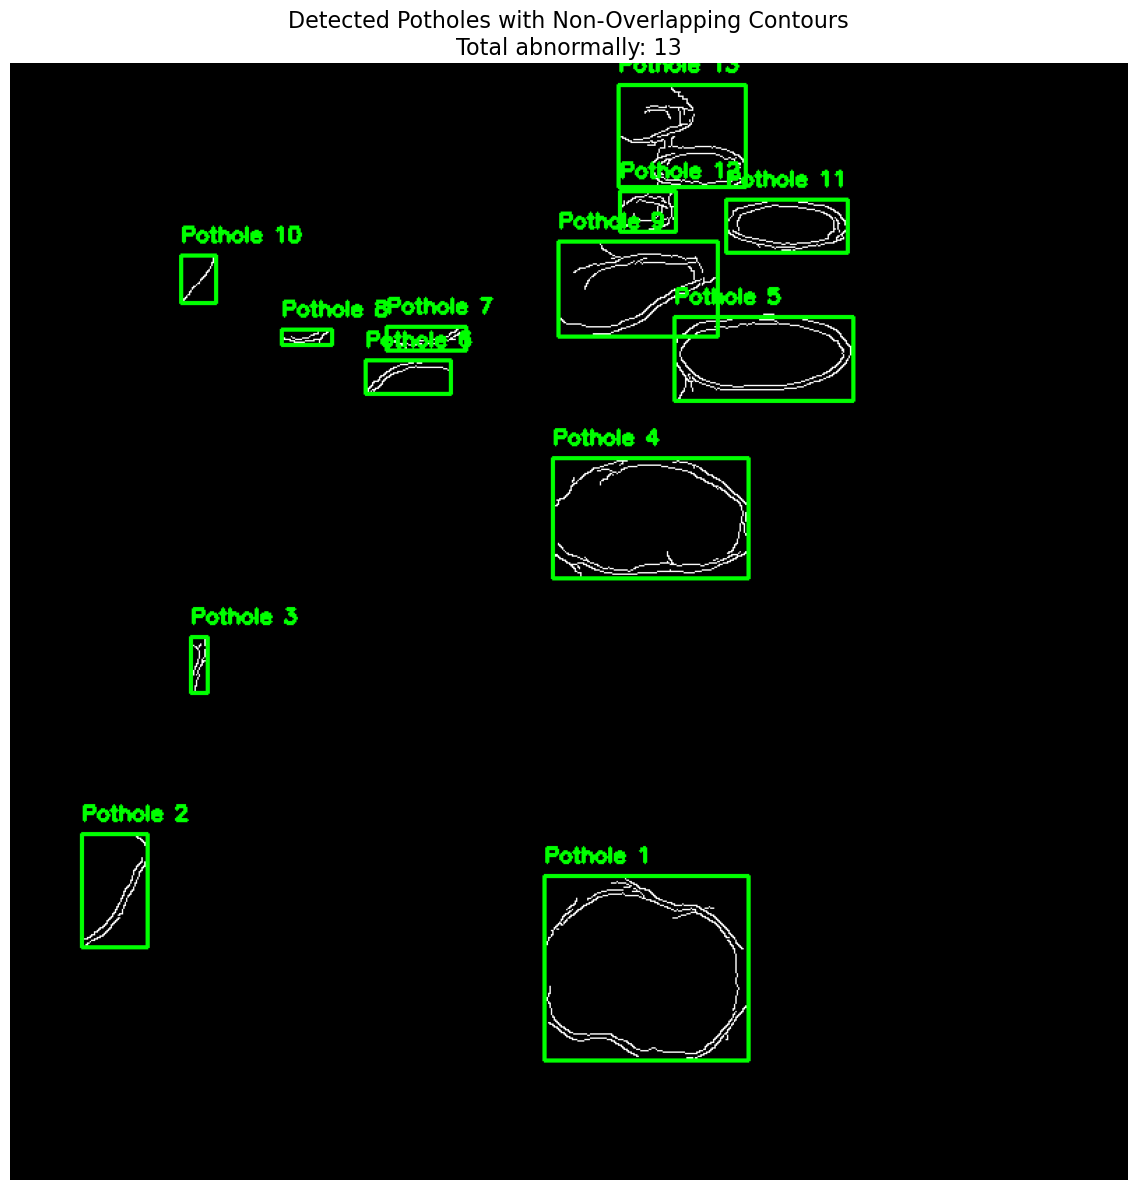

Number of potholes detected: 13


In [110]:
# Increase figure size for a larger image display
plt.figure(figsize=(12, 12))  # Adjust figsize to make the image larger

# Display the image with the detected contours and labels
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title(f'Detected Potholes with Non-Overlapping Contours\nTotal abnormally: {pothole_count}', fontsize=16)
plt.axis('off')

# Ensure layout is properly adjusted
plt.tight_layout()
plt.show()

# Print the number of potholes detected
print(f"Number of potholes detected: {pothole_count}")

